In [2]:
#Question 1.
from sklearn.datasets import load_digits
digits = load_digits()

x = digits.data[:-10]
y = digits.target[:-10]

print(x.shape)
print(y.shape)

(1787, 64)
(1787,)


In [3]:
#Question 2.
from sklearn.preprocessing import StandardScaler
standardised_data=StandardScaler().fit_transform(x)
print(standardised_data.shape)

(1787, 64)


In [4]:
#Question 3.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(standardised_data,y,test_size = 0.3,random_state = 0)


(1787, 2)


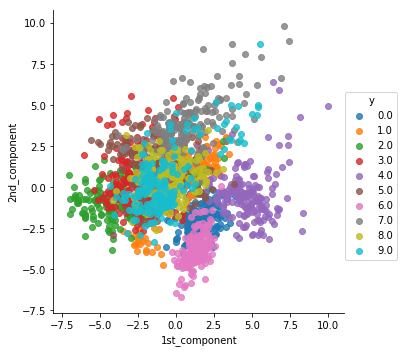

In [6]:
#Question 4.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardised_data)
print(pca_data.shape)

pca_data = np.vstack((pca_data.T, y)).T

# creating a new data frame to plot the resultant data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_component", "2nd_component", "y"))
sns.lmplot('1st_component', '2nd_component', data=pca_df, hue='y', fit_reg=False)
plt.show()

In [8]:
#Question 5
#perform logistic regression
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
pd.DataFrame({'Actual':y_test,"Predicted":y_pred})

,Actual,Predicted
0,9,8
1,6,6
2,5,5
3,3,3
4,9,9
5,1,1
6,4,4
7,3,3
8,5,5
9,8,8


In [9]:
#Question 6.
import sklearn
acc_score = sklearn.metrics.accuracy_score(y_test, y_pred.round(),normalize=True)
print("accuracy score:",acc_score)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("\n\nConfusion matrix\n\n",confusion_matrix(y_test,y_pred))
print("\n\nClassification report \n\n",classification_report(y_test,y_pred))


accuracy score: 0.957169459962756


Confusion matrix

 [[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  1  0  0  0  0  4  0]
 [ 0  1 59  3  0  0  0  0  0  0]
 [ 0  0  0 59  0  1  0  0  0  0]
 [ 0  1  0  0 47  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  1  1]
 [ 0  1  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  1  0  0 48  0  0]
 [ 0  2  0  0  0  0  0  0 50  1]
 [ 0  0  0  1  0  1  0  0  2 44]]


Classification report 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        55
          1       0.90      0.92      0.91        60
          2       1.00      0.94      0.97        63
          3       0.92      0.98      0.95        60
          4       0.98      0.98      0.98        48
          5       0.96      0.94      0.95        50
          6       1.00      0.98      0.99        51
          7       1.00      0.98      0.99        49
          8       0.88      0.94      0.91        53
          9       0.96      0.92      0.94        48

av